In [ ]:
# !pip install tensorflow==2.17.1

In [ ]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
# !unzip data.zip

In [ ]:
train_dir = 'data/train'
test_dir = 'data/test'

# Question 1

In [ ]:
model = models.Sequential()

model.add(layers.Input(shape=(200, 200, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

* Answer for Question1: binary_crossentropy.

# Question 2

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

* Total params: 20,073,473

# Question 3

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - acc: 0.5596 - loss: 0.6913 - val_acc: 0.6070 - val_loss: 0.6493
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - acc: 0.6164 - loss: 0.6417 - val_acc: 0.6269 - val_loss: 0.6263
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - acc: 0.7006 - loss: 0.5849 - val_acc: 0.6517 - val_loss: 0.6220
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - acc: 0.6804 - loss: 0.5759 - val_acc: 0.6368 - val_loss: 0.6293
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - acc: 0.7097 - loss: 0.5473 - val_acc: 0.6070 - val_loss: 0.6533
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - acc: 0.6930 - loss: 0.5625 - val_acc: 0.6318 - val_loss: 0.6029
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - acc: 0.7440 - loss: 0.5128 - val_acc: 0.6567 - val_loss: 0.6037
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - acc: 0.7311 - loss: 0.5142 - val_acc: 0.6617 - val_loss: 0.6222
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - acc: 0.774

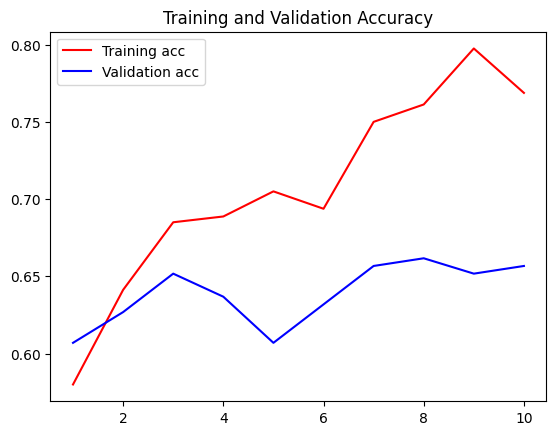

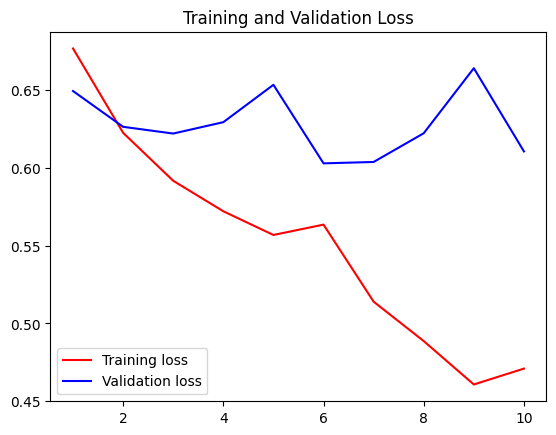

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
acc_median = np.median(acc)
acc_median

0.6993750035762787

* acc median: 0.72

# Question 4

In [ ]:
loss_std = np.std(loss)
loss_std

0.06557279266629489

loss_std: 0.068

# Question 5

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

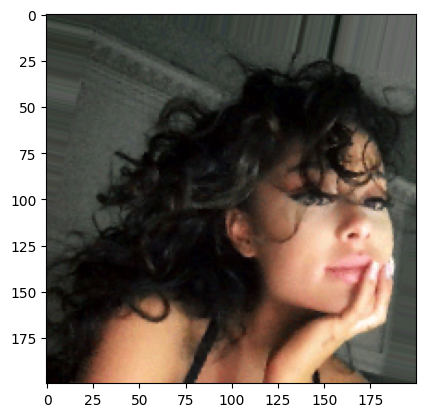

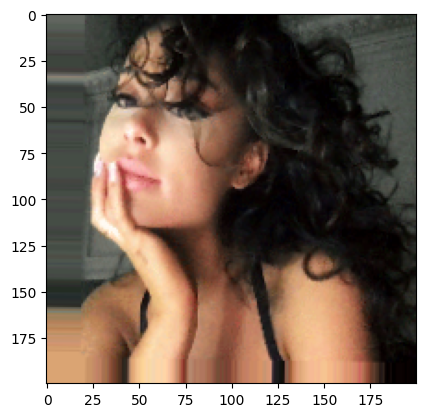

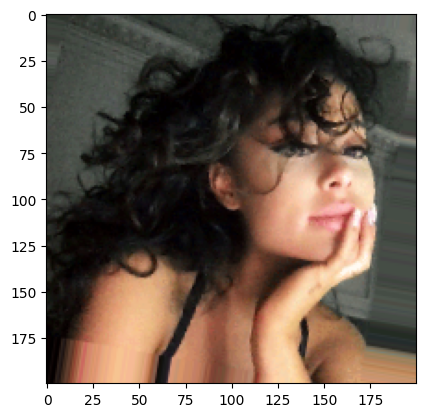

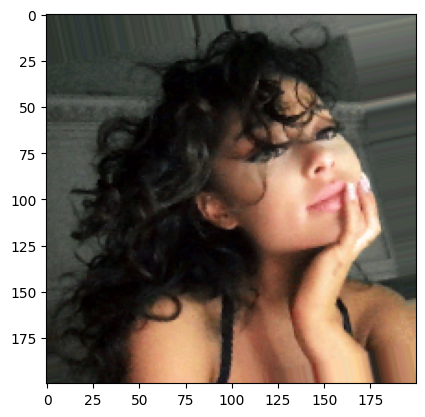

In [ ]:
fnames = [os.path.join(train_dir + "/curly", fname) for fname in os.listdir(train_dir + "/curly")]

img_path = fnames[0]
img = image.load_img(img_path, target_size=(200, 200))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - acc: 0.6479 - loss: 0.6201 - val_acc: 0.6667 - val_loss: 0.6381
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - acc: 0.6468 - loss: 0.6099 - val_acc: 0.7164 - val_loss: 0.5774
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - acc: 0.6666 - loss: 0.6230 - val_acc: 0.7114 - val_loss: 0.5834
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - acc: 0.7156 - loss: 0.5666 - val_acc: 0.7015 - val_loss: 0.5972
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - acc: 0.7208 - loss: 0.5610 - val_acc: 0.7015 - val_loss: 0.5555
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - acc: 0.7020 - loss: 0.5707 - val_acc: 0.7313 - val_loss: 0.5550
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - acc: 0.6634 - loss: 0.6036 - val_acc: 0.7214 - val_loss: 0.5473
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - acc: 0.6746 - loss: 0.5668 - val_acc: 0.7114 - val_loss: 0.5830
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 308ms/step - acc:

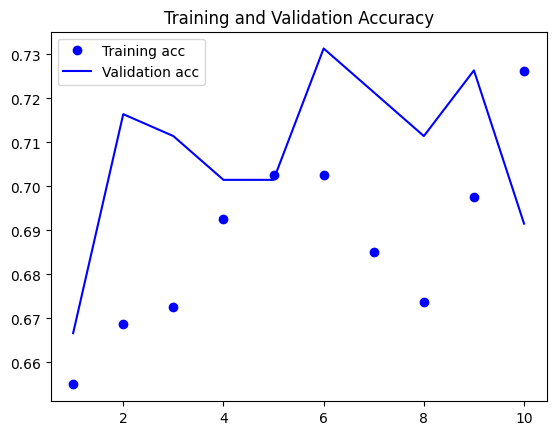

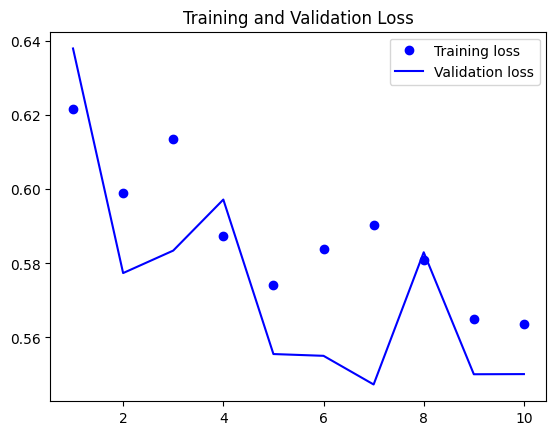

In [ ]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.5737000286579133

* Answer for Question5: 0.56

In [ ]:
val_acc_aug[5:10]

[0.7313432693481445,
 0.7213930487632751,
 0.711442768573761,
 0.7263681888580322,
 0.6915422677993774]

In [ ]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7164179086685181

* Answer for Question6: 0.71